In [1]:
from spatial_distribution_utilities.metrics import *
from spatial_distribution_utilities.spheres.api import simulate_spheres

In [4]:
plt.style.use("dark_background")

In [97]:
hd = simulate_spheres(eventspercycle = 20,
                     N = 20_000,
                     initalpf = 0.2,
                     maxpf = 0.6, #0.05,
                     temp = 0.2,
                     growthrate = 0.001,
                     maxpressure = 100.,
                     verbose=False)

Reading input from file /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/input
   eventspercycle : 20
   N : 20000
   initialpf : 0.2
   maxpf : 0.6
   temp : 0.2
   growthrate : 0.001
   maxpressure : 100
   readfile : new
   writefile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/write.dat
   datafile : /home/pt/PROJECTS/LEJE/analysis/spatial_distribution_utilities/spheres/temp/data.dat
ngrids = 161
DIM = 2
Creating new positions of spheres


Log: Calculating distances


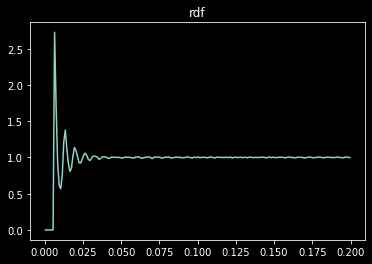

In [99]:
hd_rdf = radial_disribution(hd,
                   [[0,0],[0,1],[1,1],[1,0]],
                   0.2,
                   n_bins=200,
                   plot=True)

In [100]:
r_vals = hd_rdf["r"]
rdf_vals = hd_rdf["rd"]

In [101]:
N = r_vals.shape[0]
T = r_vals[1] - r_vals[0]

# maxR = 0.2

# yf = np.absolute(fft((rdf_vals - 1)))[:N//2]
# yf = (dst(rdf_vals - 1))[:N//2]
# yf = np.absolute(fft(np.multiply(r_vals, (rdf_vals - 1)))[:N//2])
# yf = np.absolute(dst(rdf_vals - 1))[:N//2]
# yf1 = 1 + (rfft((rdf_vals - 1)))
# yfa = np.absolute(yf1)

# xf = fftfreq(N, T)[:N//2]
# yf = 1 + (rfft((rdf_vals - 1) / (2 * np.pi)))[:xf.shape[0]]
yf  = rfft((rdf_vals - 1))
# yf = 1 + (rfft((rdf_vals - 1) / (2 * np.pi)))

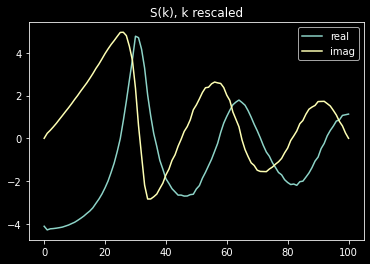

In [102]:
# plt.plot(xf, yf)
plt.plot(np.real(yf), label="real")
plt.plot(np.imag(yf), label="imag")
plt.title("S(k), k rescaled")
plt.legend()
plt.show()

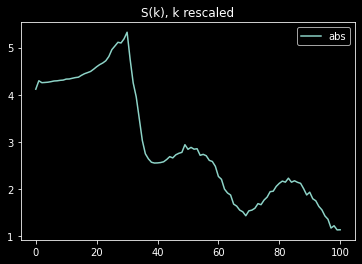

In [103]:
plt.plot(np.absolute(yf), label="abs")
plt.title("S(k), k rescaled")
plt.legend()
plt.show()

In [104]:
K = []

In [105]:
from scipy.fft import fft, rfft, dst, fftfreq

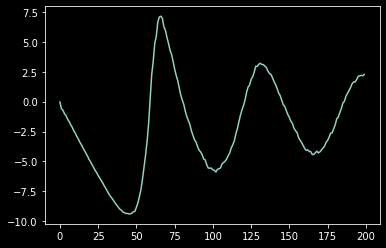

In [106]:
plt.plot(dst(rdf_vals - 1))

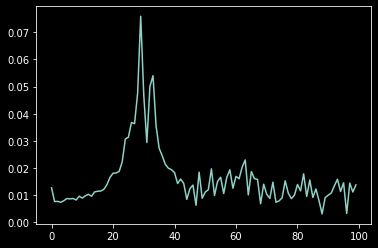

In [107]:
plt.plot(np.absolute(rfft(np.multiply((rdf_vals - 1),r_vals)))[1:])

In [108]:
n = r_vals.shape[0]
k_vals = fftfreq(n, r_vals[1]-r_vals[0])[:n//2] / (2 * np.pi)

In [109]:
from scipy.special import jv

In [110]:
Sk1 = np.zeros(k_vals.shape[0])
for i, k in enumerate(k_vals):
    Sk1[i] = np.sum([r * (rdf-1) * jv(0,(k*r)) for r, rdf in zip(r_vals, rdf_vals)])
    # Sk1[i] = np.sum([r * (rdf-1) * (np.sin(k*r)/(k*r)) for r, rdf in zip(r_vals, rdf_vals)])
    # Sk1[i] += np.sum([r * (rdf-1) * (np.sin(k*r)/(k*r)) for r, rdf in zip(-r_vals, rdf_vals)])

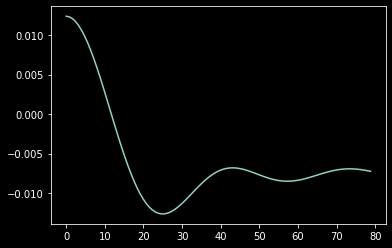

In [111]:
plt.plot(k_vals, Sk1)

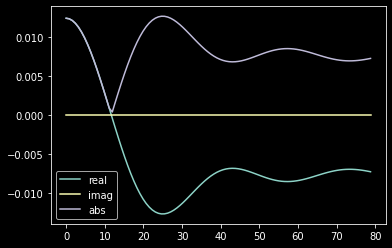

In [134]:
Sk1 = []
for i, k in enumerate(k_vals):
    Sk1.append(np.sum([r * (rdf-1) * jv(0,(k*r)) for r, rdf in zip(r_vals, rdf_vals)]))
    # a1[i] = np.sum([r * (rdf-1) * np.exp(- 1.j * k * r) for r, rdf in zip(r_vals, rdf_vals)])
plt.plot(k_vals, np.real(Sk1), label="real")
plt.plot(k_vals, np.imag(Sk1), label="imag")
plt.plot(k_vals, np.absolute(Sk1), label="abs")
plt.legend()

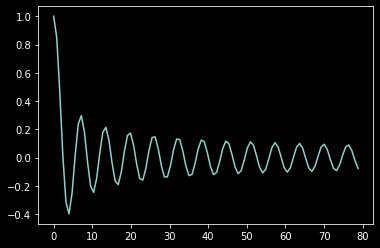

In [137]:
plt.plot(k_vals, jv(0,k_vals))

/tmp/ipykernel_1418/2639346549.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  a1[i] = np.sum([r * (rdf-1) * np.exp(- 1.j * k * r) for r, rdf in zip(r_vals, rdf_vals)])


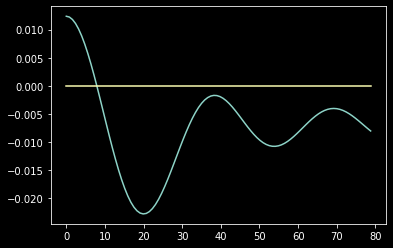

In [121]:
a1 = np.zeros(k_vals.shape[0])
for i, k in enumerate(k_vals):
    a1[i] = np.sum([r * (rdf-1) * np.exp(- 1.j * k * r) for r, rdf in zip(r_vals, rdf_vals)])
plt.plot(k_vals, np.real(a1))
plt.plot(k_vals, np.imag(a1))

/tmp/ipykernel_1418/180098757.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  a1[i] = np.exp(- 1.j * k)


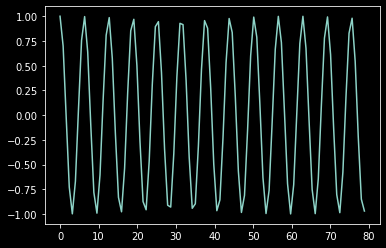

In [119]:
a1 = np.zeros(k_vals.shape[0])
for i, k in enumerate(k_vals):
    a1[i] = np.exp(- 1.j * k)
plt.plot(k_vals, np.real(a1))